In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress




In [2]:
# read HR-Employee-Attrition file
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.tsv.txt", sep='\t')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:


# drop the columns not required and create new Data set
to_drop = ['BusinessTravel', 'DailyRate', 'DistanceFromHome','EmployeeCount',
          'EmployeeNumber', 'JobLevel', 'MonthlyIncome','MonthlyRate',
          'NumCompaniesWorked', 'Over18','PercentSalaryHike', 'PerformanceRating',
          'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',
          'YearsInCurrentRole']
cdf = df.drop(to_drop, axis = 1)
cdf



,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,Yes,8,1,6,0,5
1,49,No,Research & Development,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,No,10,3,10,1,7
2,37,Yes,Research & Development,2,Other,4,Male,92,2,Laboratory Technician,3,Single,Yes,7,3,0,0,0
3,33,No,Research & Development,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,Yes,8,3,8,3,0
4,27,No,Research & Development,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,No,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,2,Medical,3,Male,41,4,Laboratory Technician,4,Married,No,17,3,5,0,3
1466,39,No,Research & Development,1,Medical,4,Male,42,2,Healthcare Representative,1,Married,No,9,3,7,1,7
1467,27,No,Research & Development,3,Life Sciences,2,Male,87,4,Manufacturing Director,2,Married,Yes,6,3,6,0,3
1468,49,No,Sales,3,Medical,4,Male,63,2,Sales Executive,2,Married,No,17,2,9,0,8


In [4]:


cdf.describe()



,Age,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.912925,2.721769,65.891156,2.729932,2.728571,11.279592,2.761224,7.008163,2.187755,4.123129
std,9.135373,1.024165,1.093082,20.329428,0.711561,1.102846,7.780782,0.706476,6.126525,3.222430,3.568136
min,18.000000,1.000000,1.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,48.000000,2.000000,2.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,3.000000,3.000000,66.000000,3.000000,3.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,4.000000,4.000000,83.750000,3.000000,4.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,5.000000,4.000000,100.000000,4.000000,4.000000,40.000000,4.000000,40.000000,15.000000,17.000000


In [5]:
# Total number of Employee Attrition
total_emp_att = cdf.Attrition.value_counts()
total_emp_att

No     1233
Yes     237
Name: Attrition, dtype: int64

In [6]:
# Percentage of 'Attrition' unique value 
per_att = cdf.Attrition.value_counts()/len(df)*100
per_att

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

In [7]:
dup_att_df = cdf.loc[ cdf["Attrition"] == "Yes", :]
dup_att_df

,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,Yes,8,1,6,0,5
2,37,Yes,Research & Development,2,Other,4,Male,92,2,Laboratory Technician,3,Single,Yes,7,3,0,0,0
14,28,Yes,Research & Development,3,Life Sciences,3,Male,50,2,Laboratory Technician,3,Single,Yes,6,3,4,0,3
21,36,Yes,Sales,4,Life Sciences,3,Male,82,2,Sales Representative,1,Single,No,10,3,5,0,3
24,34,Yes,Research & Development,1,Medical,2,Male,83,3,Research Scientist,1,Single,No,8,3,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Sales,3,Marketing,4,Male,33,3,Sales Representative,1,Married,No,1,2,1,1,0
1442,29,Yes,Research & Development,4,Medical,1,Male,36,3,Research Scientist,4,Married,Yes,4,4,2,2,2
1444,56,Yes,Research & Development,2,Technical Degree,4,Male,72,3,Laboratory Technician,3,Married,No,14,1,10,9,8
1452,50,Yes,Sales,4,Life Sciences,2,Male,94,3,Sales Executive,3,Divorced,No,12,3,6,0,1


In [8]:
dup_att_df = cdf.loc[ cdf["Attrition"] == "Yes", :]
dup_att_df

,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,Yes,8,1,6,0,5
2,37,Yes,Research & Development,2,Other,4,Male,92,2,Laboratory Technician,3,Single,Yes,7,3,0,0,0
14,28,Yes,Research & Development,3,Life Sciences,3,Male,50,2,Laboratory Technician,3,Single,Yes,6,3,4,0,3
21,36,Yes,Sales,4,Life Sciences,3,Male,82,2,Sales Representative,1,Single,No,10,3,5,0,3
24,34,Yes,Research & Development,1,Medical,2,Male,83,3,Research Scientist,1,Single,No,8,3,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Sales,3,Marketing,4,Male,33,3,Sales Representative,1,Married,No,1,2,1,1,0
1442,29,Yes,Research & Development,4,Medical,1,Male,36,3,Research Scientist,4,Married,Yes,4,4,2,2,2
1444,56,Yes,Research & Development,2,Technical Degree,4,Male,72,3,Laboratory Technician,3,Married,No,14,1,10,9,8
1452,50,Yes,Sales,4,Life Sciences,2,Male,94,3,Sales Executive,3,Divorced,No,12,3,6,0,1


In [9]:
ed_df = dup_att_df.groupby('Education')
sdf = ed_df['Education'].count()
dup_att_df.corr()



,Age,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.192184,-0.030219,0.112644,0.070830,0.031509,0.672621,-0.075944,0.452909,0.329246,0.336577
Education,0.192184,1.000000,-0.037230,0.023586,0.112600,-0.075939,0.170176,-0.102884,0.157490,0.141172,0.132882
EnvironmentSatisfaction,-0.030219,-0.037230,1.000000,-0.021467,0.093255,0.046915,-0.058569,-0.099402,0.031420,0.104580,0.000282
HourlyRate,0.112644,0.023586,-0.021467,1.000000,0.067985,-0.124763,0.030602,-0.071140,0.015526,-0.088223,-0.011530
JobInvolvement,0.070830,0.112600,0.093255,0.067985,1.000000,-0.047079,0.011386,0.040517,-0.026785,0.032574,0.026431
JobSatisfaction,0.031509,-0.075939,0.046915,-0.124763,-0.047079,1.000000,-0.002202,-0.042071,0.095849,0.091455,0.005296
TotalWorkingYears,0.672621,0.170176,-0.058569,0.030602,0.011386,-0.002202,1.000000,-0.027637,0.767402,0.535388,0.571150
WorkLifeBalance,-0.075944,-0.102884,-0.099402,-0.071140,0.040517,-0.042071,-0.027637,1.000000,-0.032627,-0.051754,-0.049469
YearsAtCompany,0.452909,0.157490,0.031420,0.015526,-0.026785,0.095849,0.767402,-0.032627,1.000000,0.702128,0.769296
YearsSinceLastPromotion,0.329246,0.141172,0.104580,-0.088223,0.032574,0.091455,0.535388,-0.051754,0.702128,1.000000,0.683218


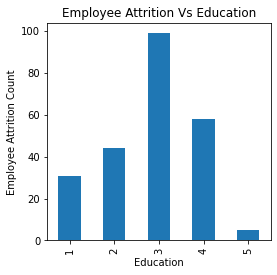

In [10]:
edchart = sdf.plot(kind='bar', figsize=(4,4))
# Set the xlabel and ylabel using class methods
edchart.set_xlabel("Education")
edchart.set_ylabel("Employee Attrition Count")
plt.title("Employee Attrition Vs Education")
plt.show()




In [11]:
per_ed = cdf.Education.value_counts()/len(df)*100
per_ed=round(per_ed,2)
per_ed

3    38.91
4    27.07
2    19.18
1    11.56
5     3.27
Name: Education, dtype: float64

In [12]:
dup_att_df = cdf.loc[ cdf["Attrition"] == "No", :]
dup_att_df

,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Research & Development,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,No,10,3,10,1,7
3,33,No,Research & Development,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,Yes,8,3,8,3,0
4,27,No,Research & Development,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,No,6,3,2,2,2
5,32,No,Research & Development,2,Life Sciences,4,Male,79,3,Laboratory Technician,4,Single,No,8,2,7,3,6
6,59,No,Research & Development,3,Medical,3,Female,81,4,Laboratory Technician,1,Married,Yes,12,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,2,Medical,3,Male,41,4,Laboratory Technician,4,Married,No,17,3,5,0,3
1466,39,No,Research & Development,1,Medical,4,Male,42,2,Healthcare Representative,1,Married,No,9,3,7,1,7
1467,27,No,Research & Development,3,Life Sciences,2,Male,87,4,Manufacturing Director,2,Married,Yes,6,3,6,0,3
1468,49,No,Sales,3,Medical,4,Male,63,2,Sales Executive,2,Married,No,17,2,9,0,8


In [13]:
edno_df = dup_att_df.groupby('Education')
sdf = edno_df['Education'].count()
dup_att_df.corr()

,Age,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.208739,-0.001000,0.005158,-0.005037,-0.033143,0.672753,-0.021222,0.264745,0.190892,0.154146
Education,0.208739,1.000000,-0.029207,0.015267,0.023233,-0.002839,0.140810,0.032791,0.048644,0.037161,0.053890
EnvironmentSatisfaction,-0.001000,-0.029207,1.000000,-0.056943,-0.048973,-0.031494,-0.013539,0.051394,-0.021621,-0.005834,-0.025595
HourlyRate,0.005158,0.015267,-0.056943,1.000000,0.036972,-0.062331,-0.009520,0.009875,-0.027368,-0.015675,-0.023118
JobInvolvement,-0.005037,0.023233,-0.048973,0.036972,1.000000,-0.032892,-0.036390,-0.039510,-0.042243,-0.041577,0.001949
JobSatisfaction,-0.033143,-0.002839,-0.031494,-0.062331,-0.032892,1.000000,-0.045290,-0.022626,-0.039733,-0.043382,-0.053233
TotalWorkingYears,0.672753,0.140810,-0.013539,-0.009520,-0.036390,-0.045290,1.000000,-0.006443,0.594469,0.383068,0.424865
WorkLifeBalance,-0.021222,0.032791,0.051394,0.009875,-0.039510,-0.022626,-0.006443,1.000000,0.011644,0.019976,0.001059
YearsAtCompany,0.264745,0.048644,-0.021621,-0.027368,-0.042243,-0.039733,0.594469,0.011644,1.000000,0.604951,0.764309
YearsSinceLastPromotion,0.190892,0.037161,-0.005834,-0.015675,-0.041577,-0.043382,0.383068,0.019976,0.604951,1.000000,0.484022


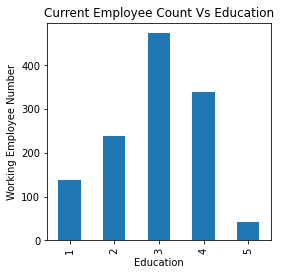

In [14]:
edchartNo = sdf.plot(kind='bar', figsize=(4,4))
# Set the xlabel and ylabel using class methods
edchartNo.set_xlabel("Education")
edchartNo.set_ylabel("Working Employee Number")
plt.title("Current Employee Count Vs Education")
plt.show()


In [17]:
per_edno = cdf.Education.value_counts()/len(df)*100
per_edno=round(per_edno,2)

per_edno

3    38.91
4    27.07
2    19.18
1    11.56
5     3.27
Name: Education, dtype: float64